# A catalog of Torch modules
The objective of this notebook is to present building blocks of neural networks in conjunction with Torch modules that provide them.  

- we classify transfer (a.k.a. activation) functions into
  - intrinsically scalar: Sigmoid, SoftPlus, Tanh, HardTanh, SoftSign, ReLU
  - intrinsically vector: SoftMax, LogSoftMax
- these can all be used with the Linear module (which provides the input weights to the layer)
- we present two loss functions: mean square error and negative log likelihood

In [1]:
-- let's discuss neural networks and layers in torch
require 'nn'
require 'utils'
Plot = require 'itorch.Plot'
print('ready')

ready	


In [2]:
m = nn.Linear(10,4)
print(m)

nn.Linear(10 -> 4)
{
  gradBias : DoubleTensor - size: 4
  weight : DoubleTensor - size: 4x10
  bias : DoubleTensor - size: 4
  gradInput : DoubleTensor - empty
  gradWeight : DoubleTensor - size: 4x10
  output : DoubleTensor - empty
}


In [3]:
print(m.bias)

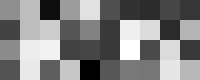

In [4]:
itorch.image(image.scale(m.weight,200,'simple'))

In [5]:
x = torch.randn(10)
y = m:forward(x)
print(y)

-0.4844
-1.0178
-0.3638
-0.2295
[torch.DoubleTensor of size 4]



In [6]:
print(m.weight * x + m.bias)

-0.4844
-1.0178
-0.3638
-0.2295
[torch.DoubleTensor of size 4]



In [7]:
-- we will use x as input to the layer [change this if you want to zoom in/out on some range]
xs = torch.range(-50,50) / 10

## Intrinsically scalar transfer functions
- [Overview](https://github.com/torch/nn/blob/master/doc/transfer.md)
- Tanh = hyperbolic tangent [y = (exp(x) - exp(-x)) / (exp(x) + exp(-x))]
- HardTanh - a piecewise linear approximation to Tanh
- Sigmoid layer [y = 1 / (1 + exp(-x))]
- ReLU layer - Rectified Linear layer [y = max(x, 0)], [ReLU/PReLU results](http://arxiv.org/pdf/1502.01852v1.pdf)
- SoftPlus layer - a 'soft' version of ReLU

In [8]:
ys1 = nn.Tanh():forward(xs)
ys2 = nn.HardTanh():forward(xs)

ys3 = nn.SoftSign():forward(xs)
ys4 = nn.Sigmoid():forward(xs)

p = Plot():line(xs,ys1,'red','Tanh'):line(xs,ys2,'green','HardTanh')
p:line(xs,ys3,'blue','SoftSign'):line(xs,ys4,'black', 'Sigmoid')
p:title('Tanh/HardTanh/Sigmoid activation functions'):legend(true):draw()

In [9]:
ys4 = nn.ReLU():forward(xs)
ys5 = nn.SoftPlus():forward(xs)
p = Plot():line(xs,ys4,'red','ReLU'):line(xs,ys5,'blue','SoftPlus'):title('ReLU and SoftPlus transfer functions'):legend(true):draw()

# Convolutional layers
- general info on [convolutional layers](https://github.com/torch/nn/blob/master/doc/convolution.md)
- [nn.TemporalConvolution](https://github.com/torch/nn/blob/master/doc/convolution.md#nn.TemporalConvolution) is a 1D convolutional operator suitable for e.g. time series
- [nn.SpatialConvolution](https://github.com/torch/nn/blob/master/doc/convolution.md#spatialconvolution) layer is a 2D convolution (for use with images)
- max pooling and subsampling layers

In [10]:
conv = nn.TemporalConvolution(1, 1, 2)
print(conv)
conv.weight[1][1] = -1
conv.weight[1][2] = 1
conv.bias[1] = 0
print(conv.weight)
print(conv.bias)

nn.TemporalConvolution
{
  gradBias : DoubleTensor - size: 1
  dW : 1
  bias : DoubleTensor - size: 1
  gradInput : DoubleTensor - empty
  weight : DoubleTensor - size: 1x2
  inputFrameSize : 1
  gradWeight : DoubleTensor - size: 1x2
  outputFrameSize : 1
  kW : 2
  output : DoubleTensor - empty
}
-1  1
[torch.DoubleTensor of size 1x2]

 0
[torch.DoubleTensor of size 1]


In [27]:
xs = torch.rand(50,1) * 0.2
xs[{{15,30},1}] = xs[{{15,30},1}] + 1
ys = conv:forward(xs)
noutput = (xs:size(1) - 2) / 1 + 1
print(xs)
print(ys)

 0.0137
 0.1248
 0.1646
 0.0881
 0.1878
 0.1499
 0.0037
 0.1936
 0.0187
 0.0453
 0.0861
 0.0622
 0.1421
 0.1135
 1.1879
 1.0177
 1.0174
 1.1475
 1.1970
 1.0873
 1.0716
 1.0219
 1.1737
 1.1657
 1.1500
 1.0835
 1.1193
 1.0423
 1.0835
 1.0765
 0.1079
 0.0149
 0.1398
 0.1825
 0.1795
 0.1741
 0.1980
 0.0182
 0.0917
 0.0061
 0.0710
 0.0083
 0.1668
 0.1583
 0.1155
 0.0971
 0.1353
 0.0967
 0.1023
 0.0788
[torch.DoubleTensor of size 50x1]



 0.1110
 0.0398
-0.0764
 0.0996
-0.0378
-0.1463
 0.1899
-0.1749
 0.0266
 0.0408
-0.0239
 0.0799
-0.0287
 1.0744
-0.1702
-0.0003
 0.1301
 0.0495
-0.1098
-0.0157
-0.0497
 0.1518
-0.0079
-0.0157
-0.0666
 0.0359
-0.0770
 0.0413
-0.0070
-0.9686
-0.0930
 0.1249
 0.0427
-0.0030
-0.0054
 0.0239
-0.1798
 0.0735
-0.0856
 0.0649
-0.0627
 0.1585
-0.0085
-0.0428
-0.0184
 0.0382
-0.0386
 0.0056
-0.0234
[torch.DoubleTensor of size 49x1]



In [12]:
-- reshape the vectors for plotting
time = torch.range(1,noutput)
xsp = xs[{{2,noutput+1},{}}]:reshape(noutput)
ysp = ys:reshape(noutput)

In [13]:
p = Plot():title('Effect of 1D conv [shifted]'):line(time,xsp+1,'blue','input'):line(time, ysp-1,'red','output')
p:xaxis('samples'):yaxis('signal'):legend(true):draw()

In [14]:
-- snippet shamelessly ripped from https://github.com/torch/tutorials/blob/master/A_datasets/mnist.lua 
-- load the training data (downloads when first used)
tar = 'http://torch7.s3-website-us-east-1.amazonaws.com/data/mnist.t7.tgz'

if not paths.dirp('mnist.t7') then
   print('==> downloading dataset')
   os.execute('wget ' .. tar)
   os.execute('tar xvf ' .. paths.basename(tar))
end
test_file = 'mnist.t7/test_32x32.t7'

----------------------------------------------------------------------
print('==> loading dataset')

-- We load the dataset from disk, it's straightforward
test_data = torch.load(test_file,'ascii')

==> loading dataset	


Size of the input is 1 x 32 x 32	


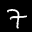

In [15]:
-- Let's plot one of the examples
inp2d = test_data.data[{244}]:type('torch.DoubleTensor')
print('Size of the input is ' .. inp2d:size(1) .. ' x ' .. inp2d:size(2) .. ' x ' .. inp2d:size(3))
itorch.image(inp2d)

In [16]:
?nn.SpatialConvolution

In [17]:
-- now we build a simple spatial convolution layer.
-- Question: what does it do?
conv2 = nn.SpatialConvolution(1, 1, 3, 3)
print(conv2)
conv2.weight[{1,1,{1,3},{1,3}}] = -1
conv2.weight[{1,1,2,2}] = 8
conv2.bias[1] = 0
print(conv2.weight)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
SpatialConvolution

 module = nn.SpatialConvolution(nInputPlane, nOutputPlane, kW, kH, [dW], 
[dH], [padW], [padH]) 

Applies a 2D convolution over an input image composed of several input 
planes. The input tensor in forward(input) is expected to be a 3D 
tensor ( nInputPlane x height x width ).

The parameters are the following:

>  nInputPlane : The number of expected input planes in the image 
given into forward() .
>  nOutputPlane : The number of output planes the convolution layer 
will produce.
>  kW : The kernel width of the convolution
>  kH : The kernel height of the convolution
>  dW : The step of the convolution in the width dimension. Default 
is 1 .
>  dH : The step of the convolution in the height dimension. Default 
is 1 .
>  padW : The additional zeros added per width to the input planes. 
Default is 0 , a good number is (kW-1)/2 .
>  padH : The additional zeros added per height to the input planes.

nn.SpatialConvolution(1 -> 1, 3x3)
{
  dH : 1
  dW : 1
  nOutputPlane : 1
  output : DoubleTensor - empty
  gradInput : DoubleTensor - empty
  gradBias : DoubleTensor - size: 1
  padH : 0
  weight : DoubleTensor - size: 1x1x3x3
  bias : DoubleTensor - size: 1
  gradWeight : DoubleTensor - size: 1x1x3x3
  padW : 0
  nInputPlane : 1
  kW : 3
  kH : 3
}
(1,1,.,.) = 
 -1 -1 -1
 -1  8 -1
 -1 -1 -1
[torch.DoubleTensor of size 1x1x3x3]



In [18]:
out2d = conv2:forward(inp2d)
itorch.image(out2d)
print(out2d:size())


  1
 30
 30
[torch.LongStorage of size 3]



In [19]:
-- what about this filter?
conv2.weight[{1,1,{1,3},{1,3}}] = 1./8
itorch.image(conv2:forward(inp2d))

## Intrinsically vector transfer functions
- these layers are typically used in the last (output layer) of the network
- for multiclass classification problems - [SoftMax](https://github.com/torch/nn/blob/master/doc/transfer.md#softmax) layer
- logarithmic verions of above: LogSoftMax are useful in conjunction with the Negative Log Likelihood loss function

In [20]:
-- softmax converts an output vector into a probability distribution:
smax = nn.SoftMax()

-- try different inputs here, observe that (1) sum is always 1 and (2) entries are always non-negative
x = torch.Tensor{-4.4, 2, 1}
y = smax:forward(x)

-- all elements 
print(y)
print(torch.sum(y))

 0.0012
 0.7302
 0.2686
[torch.DoubleTensor of size 3]

1	


# Important loss functions [a.k.a. criteria]
- [Mean Square Error](https://github.com/torch/nn/blob/master/doc/criterion.md#nn.MSECriterion)
- [Negative Log Likelihood](https://github.com/torch/nn/blob/master/doc/criterion.md#nn.ClassNLLCriterion) (for use with LogSoftMax layer as it expects logarithms on input)
- [Cross Entropy](https://github.com/torch/nn/blob/master/doc/criterion.md#crossentropycriterion) combines LogSoftMax with NLL

In [21]:
loss = nn.MSECriterion()
y = torch.Tensor{-1}
t = torch.Tensor{3}
print('MSE loss when output = ' .. y[1] .. ' and target = ' .. t[1] .. ' is ' .. loss:forward(y, t))

MSE loss when output = -1 and target = 3 is 16	


In [22]:
-- Negative log likelihood penalizes wrong predictions 
loss = nn.ClassNLLCriterion()
x = torch.Tensor{1,2,4,0.1}
print('Linear layer output is ' .. utils.vec2str(x))
lsm = nn.LogSoftMax()
y = lsm:forward(x) -- logarithms of the predictions
print('LogSoftMax layer output is ' .. utils.vec2str(y))
t = 3 -- correct class is 3
print('NLL loss assuming target = ' .. t .. ' is ' .. loss:forward(y, t))

Linear layer output is [1, 2, 4, 0.1]	


In [23]:
-- how does the loss backpropagate?
-- to increase the loss the output from logsoftmax would have to be decreased in the 3rd element
-- (as a result, this would make the correct class less probable)
dloss_dy = loss:backward(y, t)
print(dloss_dy)

-- we backpropagate through the logsoftmax nonlinearity, observe how the signal propagates into all
-- fields
dloss_dx = lsm:backward(x, dloss_dy)
print(dloss_dx)

LogSoftMax layer output is [-3.18682, -2.18682, -0.186823, -4.08682]	
NLL loss assuming target = 3 is 0.18682331504156	
 0
 0
-1
 0
[torch.DoubleTensor of size 4]



 0.0413
 0.1123
-0.1704
 0.0168
[torch.DoubleTensor of size 4]



In [24]:
-- cross entropy combines logsoftmax + class negative log likelihood
loss = nn.CrossEntropyCriterion()
-- let's verify that the loss is the same
print(loss:forward(x, t))

0.18682331504156	


In [25]:
-- and that the gradient is the same
dloss_dx = loss:backward(x, t)
print(dloss_dx)

 0.0413
 0.1123
-0.1704
 0.0168
[torch.DoubleTensor of size 4]

